In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import act
import metpy.calc as mpcalc
from metpy.units import units

from datetime import datetime
from datetime import timedelta

In [2]:
#Data grab section for KLOT ASOS
#Grab ASOS data from nearest station.
time_window = [datetime(2021, 4, 16, 0, 0), datetime(2021, 4, 24, 3, 0)]
my_asoses = act.discovery.get_asos(time_window, station = 'LOT')
station = my_asoses['LOT']

Downloading: LOT


In [3]:
#Save off data that be used later
tempsf = station.tmpf.values * units.celsius
dewpsf = station.dwpf.values * units.celsius
press = station.alti.values * units.in_Hg
press = press.to(units.hectopascal)
time = station.time.values

In [4]:
#Use MetPy to Calculate the LCL
LCL_press, LCL_temp = mpcalc.lcl(press, tempsf, dewpsf)

In [5]:
print(LCL_press)

[809.1545467149045 871.3089354986157 883.4274700913064 884.8326351775819 885.1273828908325 892.6560250865919 896.2692275820125 896.3190386157728 893.7900691833247 902.2424791445695 902.5428261749104 913.6271493021699 930.4263301516083 935.6588123316761 951.9932189122898 957.4846932284007 950.71257059139 954.4393038913006 951.6764158444325 951.6764158444325 960.7605323892872 966.2447643818541 963.3046574293903 957.8494681474481 953.7500073004629 958.8417137972624 958.8169968483113 957.4166196114982 962.4555185497891 965.1585197932011 970.9831672312026 977.5040239449061 970.6793401570671 970.8940115262646 970.9337088695421 959.950080924893 978.0722941558676 945.9513132715326 940.8010608381387 926.6278461153729 910.1362670155637 900.1706505576672 885.4176944405817 874.8586608692855 863.9726813568249 866.1620599211648 855.7767077787676 840.323717467722 836.7798950730305 786.2410512505066 776.3054380549622 776.358442924037 779.6952144365563 778.6588083809444 767.9278441799052 767.0897795647

([<matplotlib.axis.XTick at 0x2b07fb215f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

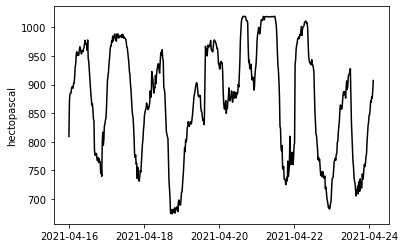

In [6]:
plt.plot(time, LCL_press, color='black')
plt.xticks(time[np.arange(0, len(time), 144)])